In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt1
%matplotlib inline
import scipy as sci
import seaborn as sns
from scipy.special import boxcox, inv_boxcox

In [2]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')

In [3]:
train = pd.read_csv('train.csv',parse_dates=['datetime'],date_parser=dateparse)
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.shape

(10886, 12)

In [5]:
test = pd.read_csv("test.csv",parse_dates=['datetime'],date_parser=dateparse)
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
test.shape

(6493, 9)

In [7]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
data = pd.concat([train,test],ignore_index=False,sort=True)
data.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0


In [9]:
data.drop(['casual','registered'],axis=1,inplace=True)

In [10]:
train.drop(['casual','registered'],axis=1,inplace=True)

In [11]:
train.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
count                  int64
dtype: object

Identifing categorical and continuous variables:
        - Categorical:
                - holiday
                - season
                - weather
                - workingday
        - Continuous:
                - atemp
                - temp
                - humidity
                - windspeed
        - Time Series
                - datetime

changing dtype of season, holiday, weather, workingday to category

data.holiday = data.holiday.astype('category')
data.weather = data.weather.astype('category')
data.workingday = data.workingday.astype('category')
data.season = data.season.astype('category')

In [12]:
data.head()

,atemp,count,datetime,holiday,humidity,season,temp,weather,windspeed,workingday
0,14.395,16.0,2011-01-01 00:00:00,0,81,1,9.84,1,0.0,0
1,13.635,40.0,2011-01-01 01:00:00,0,80,1,9.02,1,0.0,0
2,13.635,32.0,2011-01-01 02:00:00,0,80,1,9.02,1,0.0,0
3,14.395,13.0,2011-01-01 03:00:00,0,75,1,9.84,1,0.0,0
4,14.395,1.0,2011-01-01 04:00:00,0,75,1,9.84,1,0.0,0


In [13]:
data['year'] = data.datetime.dt.year
data['month'] = data.datetime.dt.month
data['day'] = data.datetime.dt.day
data['hour'] = data.datetime.dt.hour
data.drop(['datetime'],axis=1,inplace=True)

In [14]:
data.head()

,atemp,count,holiday,humidity,season,temp,weather,windspeed,workingday,year,month,day,hour
0,14.395,16.0,0,81,1,9.84,1,0.0,0,2011,1,1,0
1,13.635,40.0,0,80,1,9.02,1,0.0,0,2011,1,1,1
2,13.635,32.0,0,80,1,9.02,1,0.0,0,2011,1,1,2
3,14.395,13.0,0,75,1,9.84,1,0.0,0,2011,1,1,3
4,14.395,1.0,0,75,1,9.84,1,0.0,0,2011,1,1,4


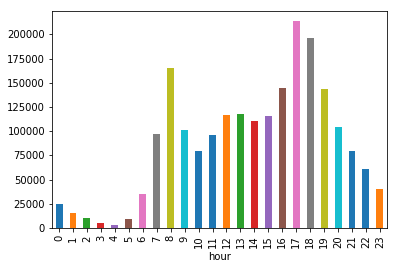

In [15]:
data.groupby('hour')['count'].sum().plot.bar()

In [16]:
data.loc[data['year']==2011,'year'] = 0
data.loc[data['year']==2012,'year'] = 1

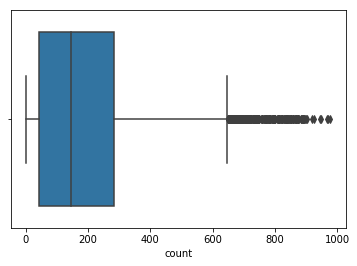

In [17]:
sns.boxplot(data['count'])

In [18]:
data.head()

,atemp,count,holiday,humidity,season,temp,weather,windspeed,workingday,year,month,day,hour
0,14.395,16.0,0,81,1,9.84,1,0.0,0,0,1,1,0
1,13.635,40.0,0,80,1,9.02,1,0.0,0,0,1,1,1
2,13.635,32.0,0,80,1,9.02,1,0.0,0,0,1,1,2
3,14.395,13.0,0,75,1,9.84,1,0.0,0,0,1,1,3
4,14.395,1.0,0,75,1,9.84,1,0.0,0,0,1,1,4


In [19]:
data.drop(['temp','day','season'],axis=1,inplace=True)

In [20]:
data = pd.get_dummies(data, columns = ['weather','month','hour'],drop_first=True)
data.head()

,atemp,count,holiday,humidity,windspeed,workingday,year,weather_2,weather_3,weather_4,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,14.395,16.0,0,81,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13.635,40.0,0,80,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13.635,32.0,0,80,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.395,13.0,0,75,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14.395,1.0,0,75,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data.head()

,atemp,count,holiday,humidity,windspeed,workingday,year,weather_2,weather_3,weather_4,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,14.395,16.0,0,81,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13.635,40.0,0,80,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13.635,32.0,0,80,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14.395,13.0,0,75,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14.395,1.0,0,75,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
train = data[~data['count'].isnull()]
test = data[data['count'].isnull()]
train.shape, test.shape

((10886, 44), (6493, 44))

## 1) Linear Regression

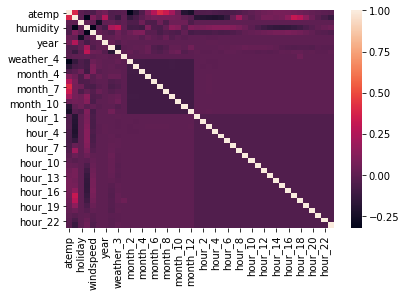

In [23]:
sns.heatmap(train.corr())

In [24]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
Scl = StandardScaler()

In [25]:
Scl = StandardScaler()
a = Scl.fit_transform(train.drop('count',axis=1))
a = pd.DataFrame(a,columns=train.drop('count',axis=1).columns)
train_std = train.copy()
train_std.atemp = a.atemp
train_std.humidity = a.humidity
train_std.windspeed = a.windspeed
train_std['count'] = train['count']
train_std.head()

,atemp,count,holiday,humidity,windspeed,workingday,year,weather_2,weather_3,weather_4,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,-1.092737,16.0,0,0.993213,-1.567754,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.182421,40.0,0,0.941249,-1.567754,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.182421,32.0,0,0.941249,-1.567754,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.092737,13.0,0,0.681430,-1.567754,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.092737,1.0,0,0.681430,-1.567754,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
train_std.to_csv('R.csv',index_label=False)

C:\Users\nitis\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


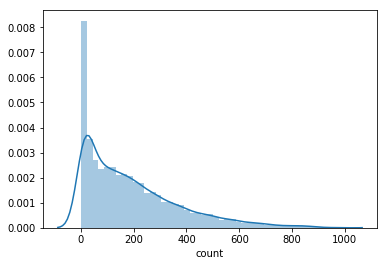

In [27]:
sns.distplot(train_std['count'])

In [28]:
a = boxcox(train_std['count'],0.3)

In [29]:
train_std['count'] = a

C:\Users\nitis\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


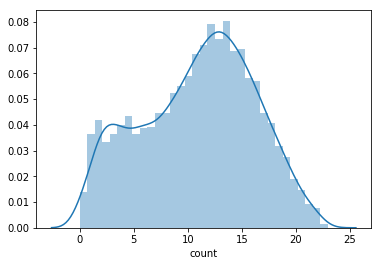

In [30]:
sns.distplot(train_std['count'])

In [31]:
cols = train_std.columns.tolist()
cols.remove('count')

In [32]:
predictors = train_std.loc[:,cols]
target = train_std.loc[:,'count']

In [33]:
predictors.head()

,atemp,holiday,humidity,windspeed,workingday,year,weather_2,weather_3,weather_4,month_2,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,-1.092737,0,0.993213,-1.567754,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.182421,0,0.941249,-1.567754,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.182421,0,0.941249,-1.567754,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.092737,0,0.681430,-1.567754,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.092737,0,0.681430,-1.567754,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
target.head()

0    4.324656
1    6.747507
2    6.094757
3    3.862179
4    0.000000
Name: count, dtype: float64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25)

In [36]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((8164, 43), (2722, 43), (8164,), (2722,))

In [37]:
lm = linear_model.LinearRegression()

In [38]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
lm.score(X_train,y_train)

0.8235413219339281

In [40]:
pred = lm.predict(X_train)
mse = np.mean((pred - y_train)**2)
mse

4.87540156718913

In [41]:
from sklearn import model_selection
print("\nCross Validation Results: ")
preds = pd.concat([X_train,X_test])
targt = pd.concat([y_train,y_test])
kfold = model_selection.KFold(n_splits=20)
results_rf = model_selection.cross_val_score(lm, preds, targt, cv= kfold,scoring='r2')
results_rf


Cross Validation Results: 


array([ 8.16983896e-01,  8.37276432e-01, -8.46216630e+20,  8.10794856e-01,
        8.42075750e-01,  8.27092589e-01,  8.07485155e-01,  8.44189907e-01,
        8.27832330e-01,  8.10431690e-01,  7.97301174e-01,  8.17922045e-01,
        8.07772082e-01,  8.08140418e-01,  8.47608809e-01,  8.08566138e-01,
        8.33928438e-01,  7.70945174e-01,  8.29947991e-01,  8.28171285e-01])

In [42]:
test.head()

,atemp,count,holiday,humidity,windspeed,workingday,year,weather_2,weather_3,weather_4,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,11.365,NaN,0,56,26.0027,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,13.635,NaN,0,56,0.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13.635,NaN,0,56,0.0000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12.880,NaN,0,56,11.0014,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12.880,NaN,0,56,11.0014,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
Scl = StandardScaler()
a = Scl.fit_transform(test.drop('count',axis=1))
a = pd.DataFrame(a,columns=test.drop('count',axis=1).columns)
test_std = test.copy()
test_std.atemp = a.atemp
test_std.humidity = a.humidity
test_std.windspeed = a.windspeed
test_std.head()

,atemp,count,holiday,humidity,windspeed,workingday,year,weather_2,weather_3,weather_4,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,-1.440193,NaN,0,-0.421172,1.620888,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.181711,NaN,0,-0.421172,-1.531139,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.181711,NaN,0,-0.421172,-1.531139,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.267682,NaN,0,-0.421172,-0.197558,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.267682,NaN,0,-0.421172,-0.197558,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
preds = lm.predict(test_std.drop('count',axis=1))
preds

array([ 3.09737293,  1.9042602 ,  0.65248262, ..., 12.62372702,
       11.63890054,  9.97177066])

In [45]:
sub = pd.read_csv("test.csv",parse_dates=['datetime'],date_parser=dateparse)
sub_1 = sub.loc[:,['datetime','count']]
sub_1.head()

C:\Users\nitis\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,datetime,count
0,2011-01-20 00:00:00,NaN
1,2011-01-20 01:00:00,NaN
2,2011-01-20 02:00:00,NaN
3,2011-01-20 03:00:00,NaN
4,2011-01-20 04:00:00,NaN


In [46]:
a = inv_boxcox(preds,0.3)
a[27]

nan

In [47]:
sub_1.loc[:,['count']] = a.round(0)
sub_1.index = sub_1['datetime']
sub_1.drop(['datetime'],axis=1,inplace=True)
sub_1.head()

,count
datetime,
2011-01-20 00:00:00,9.0
2011-01-20 01:00:00,5.0
2011-01-20 02:00:00,2.0
2011-01-20 03:00:00,0.0
2011-01-20 04:00:00,0.0


In [48]:
sub_1.to_csv('submission.csv')

# Lasso Regression

In [52]:
from sklearn.model_selection import GridSearchCV

In [72]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=1e-08, normalize=True)

In [73]:
parameters_grid = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]}

In [74]:
grid_cv = GridSearchCV(lassoReg, parameters_grid, cv = 4)

In [75]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=Lasso(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [76]:
grid_cv.best_params_

{'alpha': 1e-08}

In [85]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=1e-05, normalize=True)

In [86]:
lassoReg.fit(X_train,y_train)

Lasso(alpha=1e-08, copy_X=True, fit_intercept=True, max_iter=1000000000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [87]:
pred = lassoReg.predict(X_train)
mse = np.mean((pred - y_train)**2)
mse

4.875401567541734

In [88]:
preds = lassoReg.predict(test_std.drop('count',axis=1))
preds

array([ 3.09747186,  1.90430368,  0.65252715, ..., 12.62370669,
       11.6388836 ,  9.97175415])

In [81]:
sub = pd.read_csv("test.csv",parse_dates=['datetime'],date_parser=dateparse)
sub_1 = sub.loc[:,['datetime','count']]
sub_1.head()

C:\Users\nitis\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,datetime,count
0,2011-01-20 00:00:00,NaN
1,2011-01-20 01:00:00,NaN
2,2011-01-20 02:00:00,NaN
3,2011-01-20 03:00:00,NaN
4,2011-01-20 04:00:00,NaN


In [82]:
a = inv_boxcox(preds,0.3)
a[27]

nan

In [83]:
sub_1.loc[:,['count']] = a.round(0)
sub_1.index = sub_1['datetime']
sub_1.drop(['datetime'],axis=1,inplace=True)
sub_1.head()

,count
datetime,
2011-01-20 00:00:00,9.0
2011-01-20 01:00:00,5.0
2011-01-20 02:00:00,2.0
2011-01-20 03:00:00,0.0
2011-01-20 04:00:00,0.0


In [84]:
sub_1.to_csv('submission.csv')

# PCA

In [89]:
train_std = Scl.fit_transform(train.drop('count',axis=1))
train_std = pd.DataFrame(train_std,columns=train.drop('count',axis=1).columns)
train_std['count'] = train['count']

In [119]:
from sklearn.decomposition import PCA
mypca = PCA(n_components = 20)

In [120]:
pcs = mypca.fit_transform(train_std.drop('count',axis=1))
mypca.explained_variance_ratio_

array([0.04500243, 0.04256884, 0.03102795, 0.02882222, 0.02686794,
       0.02543467, 0.02529646, 0.02520412, 0.02516584, 0.02508394,
       0.02491324, 0.02474468, 0.02462354, 0.02433775, 0.02428757,
       0.02427248, 0.02427181, 0.02427093, 0.02427084, 0.02426969])

In [121]:
pcs = pd.DataFrame(pcs)
pcs['count'] = train['count']
pcs.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,count
0,-1.337426,-0.337857,0.636077,0.233710,-0.632136,-0.150452,-0.007544,-0.003276,0.021124,-0.042581,...,-0.090505,-0.246699,0.027617,-0.020361,0.006318,-0.005526,0.004095,-0.007725,-0.015476,16.0
1,-1.821437,-0.479199,0.498837,-0.048103,-1.303465,0.054622,-0.207524,-0.190207,0.291950,-0.786965,...,-0.070858,0.781055,1.748394,-1.158083,0.029270,0.237634,-0.994696,1.828713,-1.854159,40.0
2,-1.816470,-0.547107,0.683782,-0.044591,-1.436844,-0.088885,-0.068373,0.521487,0.785452,-1.011508,...,-0.523575,-1.298696,-0.965446,-0.465755,-0.072377,0.052370,-0.095310,-0.266176,-0.096251,32.0
3,-1.695989,-0.573188,1.158788,0.430228,-1.012552,-0.242606,-0.315155,-0.044364,0.323733,0.358479,...,-0.796567,-0.067795,0.941022,0.143449,0.050445,0.245959,-0.172080,0.006940,-0.332874,13.0
4,-1.730698,-0.521788,0.509878,-0.060845,-0.833181,-0.341450,-0.296352,-0.551821,0.276660,0.062628,...,-0.026415,0.668665,-0.800515,0.809941,0.021051,0.133856,-0.035204,-0.094461,-0.054734,1.0


In [122]:
pcs['count'] = np.log(pcs['count'])
pcs.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,count
0,-1.337426,-0.337857,0.636077,0.233710,-0.632136,-0.150452,-0.007544,-0.003276,0.021124,-0.042581,...,-0.090505,-0.246699,0.027617,-0.020361,0.006318,-0.005526,0.004095,-0.007725,-0.015476,2.772589
1,-1.821437,-0.479199,0.498837,-0.048103,-1.303465,0.054622,-0.207524,-0.190207,0.291950,-0.786965,...,-0.070858,0.781055,1.748394,-1.158083,0.029270,0.237634,-0.994696,1.828713,-1.854159,3.688879
2,-1.816470,-0.547107,0.683782,-0.044591,-1.436844,-0.088885,-0.068373,0.521487,0.785452,-1.011508,...,-0.523575,-1.298696,-0.965446,-0.465755,-0.072377,0.052370,-0.095310,-0.266176,-0.096251,3.465736
3,-1.695989,-0.573188,1.158788,0.430228,-1.012552,-0.242606,-0.315155,-0.044364,0.323733,0.358479,...,-0.796567,-0.067795,0.941022,0.143449,0.050445,0.245959,-0.172080,0.006940,-0.332874,2.564949
4,-1.730698,-0.521788,0.509878,-0.060845,-0.833181,-0.341450,-0.296352,-0.551821,0.276660,0.062628,...,-0.026415,0.668665,-0.800515,0.809941,0.021051,0.133856,-0.035204,-0.094461,-0.054734,0.000000


In [123]:
cols = pcs.columns.tolist()
cols.remove('count')

In [124]:
predictors = pcs.loc[:,cols]
target = pcs.loc[:,'count']

In [125]:
predictors.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.337426,-0.337857,0.636077,0.233710,-0.632136,-0.150452,-0.007544,-0.003276,0.021124,-0.042581,0.041744,-0.090505,-0.246699,0.027617,-0.020361,0.006318,-0.005526,0.004095,-0.007725,-0.015476
1,-1.821437,-0.479199,0.498837,-0.048103,-1.303465,0.054622,-0.207524,-0.190207,0.291950,-0.786965,0.006201,-0.070858,0.781055,1.748394,-1.158083,0.029270,0.237634,-0.994696,1.828713,-1.854159
2,-1.816470,-0.547107,0.683782,-0.044591,-1.436844,-0.088885,-0.068373,0.521487,0.785452,-1.011508,1.364346,-0.523575,-1.298696,-0.965446,-0.465755,-0.072377,0.052370,-0.095310,-0.266176,-0.096251
3,-1.695989,-0.573188,1.158788,0.430228,-1.012552,-0.242606,-0.315155,-0.044364,0.323733,0.358479,-1.291731,-0.796567,-0.067795,0.941022,0.143449,0.050445,0.245959,-0.172080,0.006940,-0.332874
4,-1.730698,-0.521788,0.509878,-0.060845,-0.833181,-0.341450,-0.296352,-0.551821,0.276660,0.062628,0.801864,-0.026415,0.668665,-0.800515,0.809941,0.021051,0.133856,-0.035204,-0.094461,-0.054734


In [126]:
target.head()

0    2.772589
1    3.688879
2    3.465736
3    2.564949
4    0.000000
Name: count, dtype: float64

In [127]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25,random_state =100)

In [128]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((8164, 20), (2722, 20), (8164,), (2722,))

In [129]:
lm = linear_model.LinearRegression()

In [130]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [131]:
lm.score(X_train,y_train)

0.43047011285169423

In [118]:
import statsmodels.formula.api as sm
m = sm.ols(formula="count~1+2+3+4+5+6+7+8+9+10",data=pcs)
AR = m.fit()
print(AR.summary())

PatsyError: numbers besides '0' and '1' are only allowed with **
    count~1+2+3+4+5+6+7+8+9+10
            ^